In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w, b, num_examples):  #@save
    #synthetic y=Xw+b noise
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))#convert to column vector

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.3860, -1.5363]) 
label: tensor([10.1878])


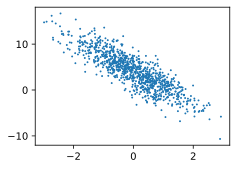

In [ ]:
d2l.set_figsize()
#the linear relation between the second dimension (the second column)of features with labels
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0521, -0.2948],
        [-0.1241,  0.1814],
        [-1.0440, -1.0855],
        [-0.4339, -0.5731],
        [ 1.3467, -2.7306],
        [-0.3091, -0.2478],
        [-1.1729, -2.6800],
        [-0.4931,  1.2563],
        [-2.3928,  0.3107],
        [ 0.8602, -1.3723]]) 
 tensor([[ 5.1077],
        [ 3.3341],
        [ 5.7981],
        [ 5.2738],
        [16.1872],
        [ 4.4328],
        [10.9610],
        [-1.0504],
        [-1.6607],
        [10.5879]])


In [8]:
#initial the parameter
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [9]:
def linreg(X, w, b):  #@save
    #linear regression model
    return torch.matmul(X, w) + b

In [10]:
def squared_loss(y_hat, y):  #@save
    #MSE
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [11]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.040544
epoch 2, loss 0.000154
epoch 3, loss 0.000055


In [13]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0008, -0.0001], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0017], grad_fn=<RsubBackward1>)
